# Matplotlib 进阶
## 第一章 - Matplotlib 101
    1.1 概览
    1.2 图
    1.3 坐标系 & 子图
    1.4 坐标轴
    1.5 刻度
    1.6 基础元素
    
本文来自 公众号:王的机器
https://mp.weixin.qq.com/s/b8IAf-liXvgn50-3HwT1VA

- Matplotlib 是 Python 中最基本的可视化工具，官网里 ((https://matplotlib.org/) 有无数好资料。
- 先来类比一下人类和 Matplotlib 画图过程。

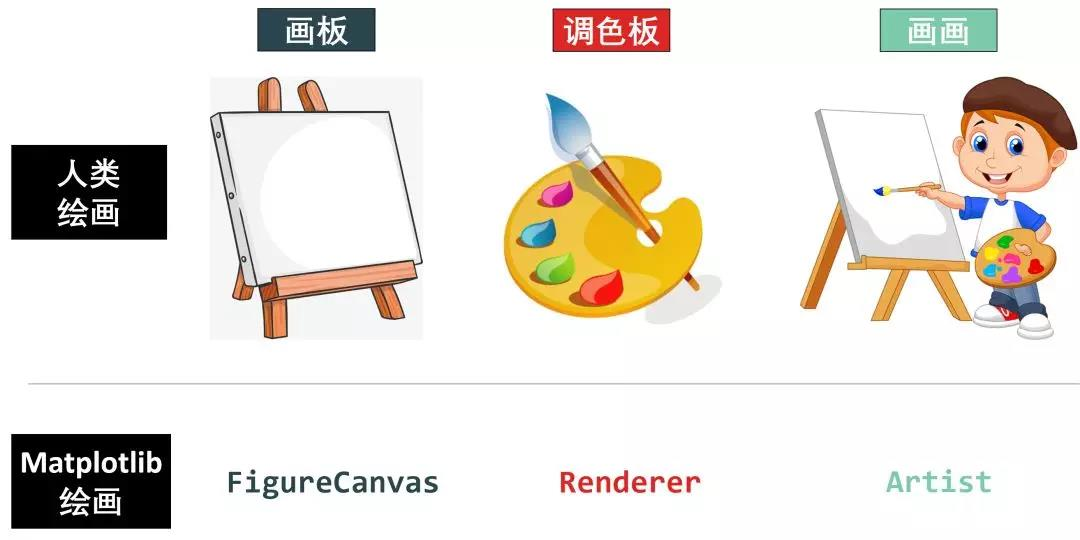

## 想想平时我们怎么画图，是不是分三步
- 找画板
- 用调色板
- 画画

## Matplotlib 模拟了类似过程，也分三步
- FigureCanvas
- Renderer
- Artist

### 上面是 Matplotlib 里的三层 API：
- FigureCanvas 帮你确定画图的地方
- Renderer 帮你把想画的东西展示在屏幕上
- Artist 帮你用 Renderer 在 Canvas 上画图
- 95% 的用户 (我们这些凡人) 只需用 Artist 就能自由的在电脑上画图了。


- 下面代码就是给 matplotlib 起了个别名 mpl，由于用 matplotlib.plot 比较多，也给它起了个别名 plt。
- 而 %matplotlib inline 就是在 Jupyter notebook 里面内嵌画图的，

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

## Matplotlib 是一个巨无霸，乍一看无从下手，只能分解之后各点击破。总体来说，它包含两类元素：
- 基础 (primitives) 类：线 (line), 点 (marker), 文字 (text), 图例 (legend), 网格 (grid), 标题 (title), 图片 (image) 等。
- 容器 (containers) 类：图 (figure), 坐标系 (axes), 坐标轴 (axis) 和刻度 (tick)

## 基础类元素是我们想画出的标准对象，而容器类元素是基础类元素的寄居处，它们也有层级结构。
   图 → 坐标系 → 坐标轴 → 刻度
   
   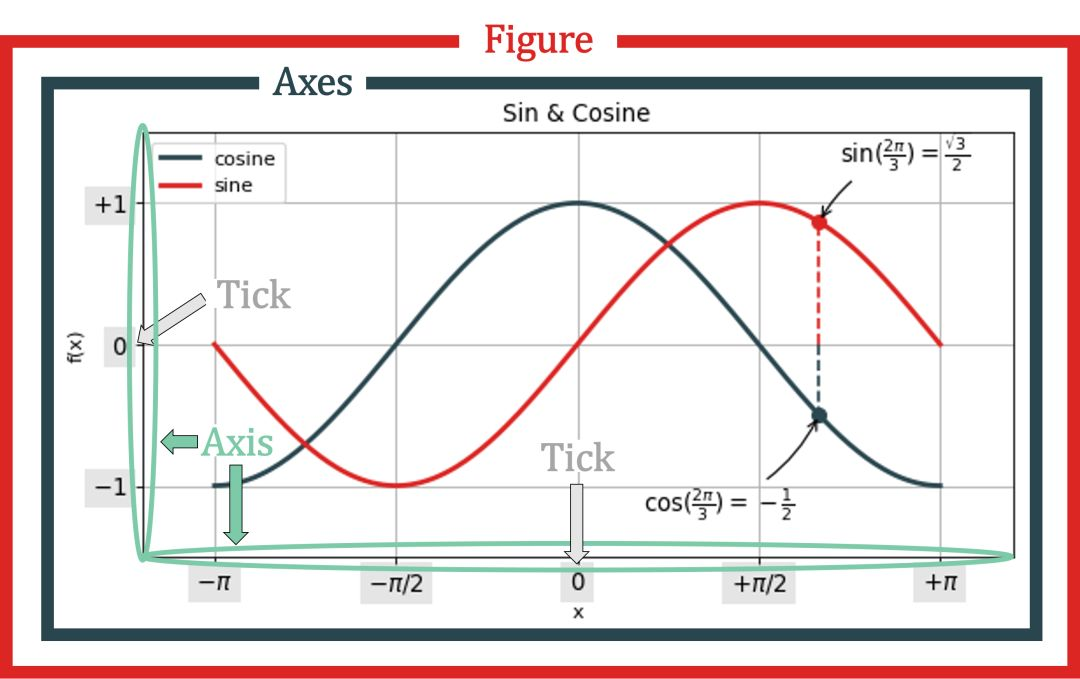
   

### 由上图看出：
- 图包含着坐标系 (多个)
- 坐标系由坐标轴组成 (横轴 xAxis 和纵轴 yAxis)
- 坐标轴上面有刻度 (主刻度 MajorTicks 和副刻度 MinorTicks)

- Python 中万物皆对象，Matplotlib 里这些元素也都是对象。下面代码打印出坐标系、坐标轴和刻度。


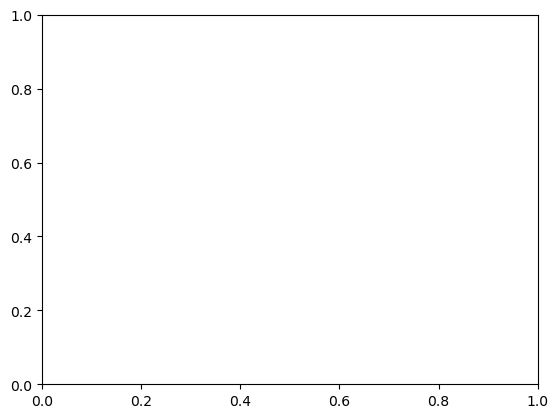

fig.axes: [<AxesSubplot:>] 

ax.xaxis: XAxis(80.0,52.8)
ax.yaxis: YAxis(80.0,52.8) 

ax.xaxis.majorTicks: [<matplotlib.axis.XTick object at 0x00000221BEF99288>, <matplotlib.axis.XTick object at 0x00000221BEDF3AC8>, <matplotlib.axis.XTick object at 0x00000221BEDC50C8>, <matplotlib.axis.XTick object at 0x00000221BF698088>, <matplotlib.axis.XTick object at 0x00000221BF680AC8>, <matplotlib.axis.XTick object at 0x00000221BF69EA88>] 

ax.yaxis.majorTicks: [<matplotlib.axis.YTick object at 0x00000221BEFA0108>, <matplotlib.axis.YTick object at 0x00000221BEECA448>, <matplotlib.axis.YTick object at 0x00000221BEF106C8>, <matplotlib.axis.YTick object at 0x00000221BF7EB308>, <matplotlib.axis.YTick object at 0x00000221BF7F9888>, <matplotlib.axis.YTick object at 0x00000221BF7FF5C8>] 

ax.xaxis.minorTicks: [<matplotlib.axis.XTick object at 0x00000221BEFAD4C8>]
ax.yaxis.minorTicks: [<matplotlib.axis.YTick object at 0x00000221BEFB6C48>]


In [3]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.show()

xax = ax.xaxis
yax = ax.yaxis

print( 'fig.axes:', fig.axes, '\n')
print( 'ax.xaxis:', xax )
print( 'ax.yaxis:', yax, '\n' )
print( 'ax.xaxis.majorTicks:', xax.majorTicks, '\n' )
print( 'ax.yaxis.majorTicks:', yax.majorTicks, '\n')
print( 'ax.xaxis.minorTicks:', xax.minorTicks )
print( 'ax.yaxis.minorTicks:', yax.minorTicks )

从打印结果可看出坐标系、坐标轴和刻度都是对象。细看一下发现 xaxis 和 yaxis 上面都有 6 个主刻度 (majorTicks)。

此外，由坐标系和坐标轴指向同一个图 (侧面验证了图、坐标系和坐标轴的层级性)。

In [4]:
print( 'axes.figure:', ax.figure )
print( 'xaxis.figure:', xax.figure )
print( 'yaxis.figure:', yax.figure )

axes.figure: Figure(640x480)
xaxis.figure: Figure(640x480)
yaxis.figure: Figure(640x480)


## 创造完以上四个容器元素后，我们可在上面添加各种基础元素，比如：
- 在坐标轴和刻度上添加标签
- 在坐标系中添加线、点、网格、图例和文字
- 在图中添加图例
## 如下图所示：
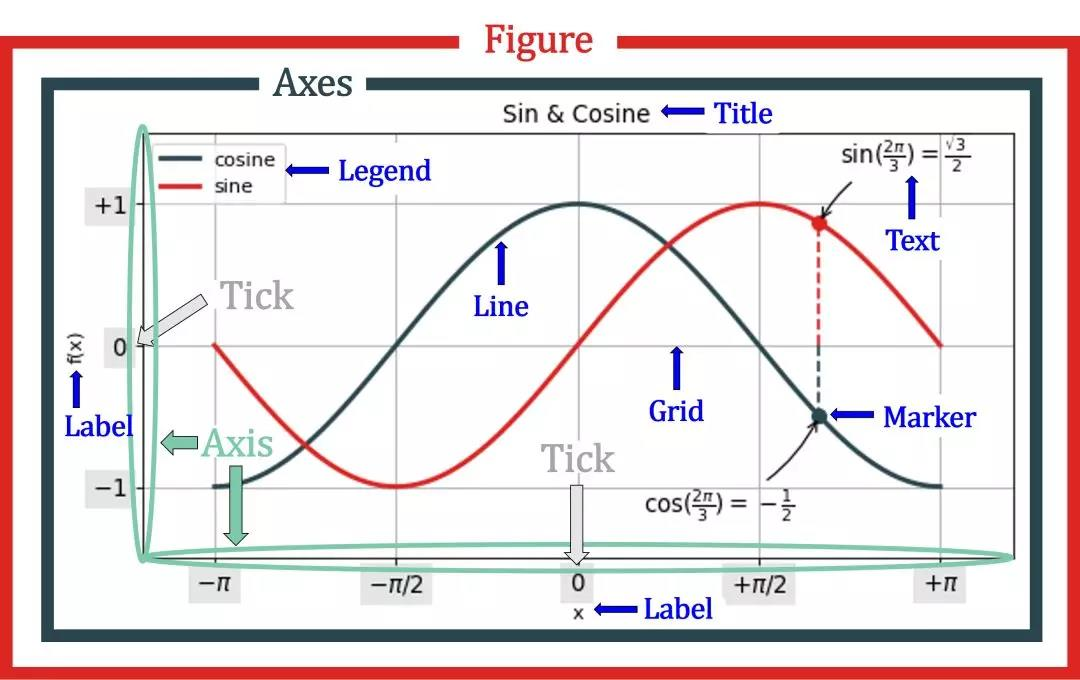

# 图 figure()
- 接下来四节分别介绍四大容器，让我们先从「图」开始。
- 图是整个层级的顶部。
- 在图中可以添加基本元素「文字」

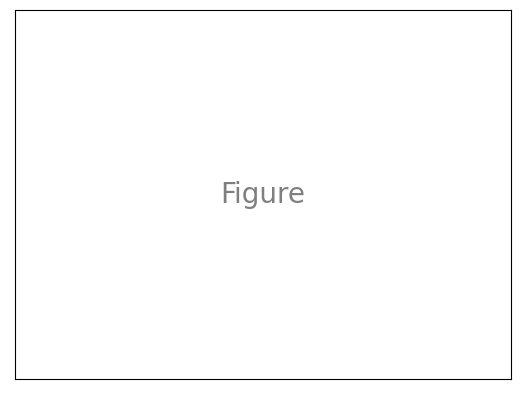

In [5]:
plt.figure()
plt.text( 0.5, 0.5, 'Figure', ha='center', 
          va='center', size=20, alpha=.5 )
plt.xticks([]), plt.yticks([])  # 取消ticks
plt.show()

## 上面用到的 plt.text() 函数，其参数解释如下：
- 第一、二个参数是指横轴和纵轴坐标
- 第三个参数字符是指要显示的内容
- ha, va 是横向和纵向位置
- size 设置字体大小
- alpha 设置字体透明度 (0.5 是半透明)

在图中可以添加基本元素「图片」。


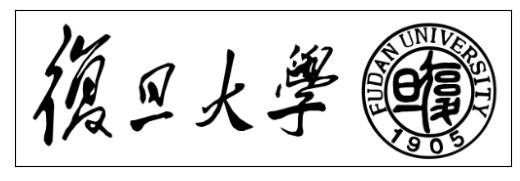

In [6]:
from PIL import Image
import numpy as np
plt.figure()
plt.xticks([]), plt.yticks([])
im = np.array(Image.open('fudan.png'))
plt.imshow(im)
plt.show()

#用 Image.open() 将图片转成像素存在 ndarray 中，再用 plt.imshow() 展示。

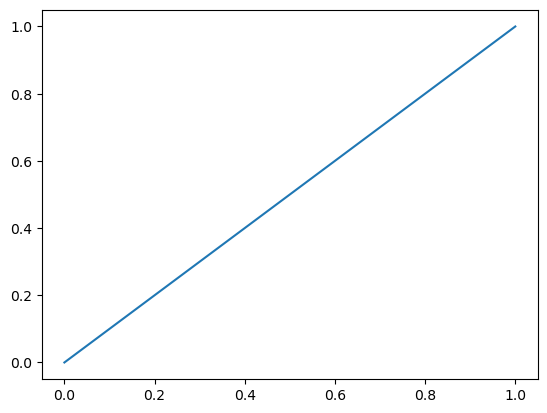

In [7]:
#在图中可以添加基本元素「折线」
plt.figure()
plt.plot( [0,1],[0,1] )
#plt.plot() 函数是用来画折线图的，前两个参数分别是 x 和 y，该函数会在后面细讲。
plt.show()

### 当我们每次说画东西，看起来是在图 (Figure) 里面进行的，实际上是在坐标系 (Axes) 里面进行的。一幅图中可以有多个坐标系，因此在坐标系里画东西更方便 (有些设置使用起来也更灵活)。
### 下面来看看层级中排名第二的「坐标系」。

# 坐标系 & 子图

- 一幅图 (Figure) 中可以有多个坐标系 (Axes)，那不是说一幅图中有多幅子图 (Subplot)，因此坐标系和子图是不是同样的概念？
- 在绝大多数情况下是的，两者有一点细微差别：

  - 子图在母图中的网格结构一定是规则的
  - 坐标系在母图中的网格结构可以是不规则的

- 由此可见，子图是坐标系的一个特例，来我们先研究特例。


## 子图
- 把图想成矩阵，那么子图就是矩阵中的元素，因此可像定义矩阵那样定义子图 - (行数、列数、第几个子图)。

    subplot(rows, columns, i-th plots)

- 文字解释起来有些晦涩，看代码和图就好懂了。


Text(0.5, 0.5, '2,1,2')

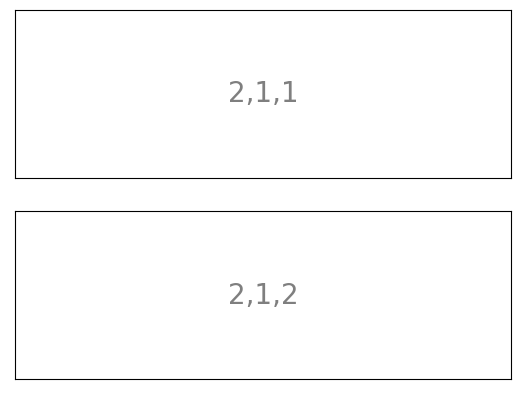

In [8]:
plt.subplot(2,1,1)
plt.xticks([]), plt.yticks([])
plt.text( 0.5, 0.5, '2,1,1', ha='center', 
          va='center', size=20, alpha=.5 )

plt.subplot(2,1,2)
plt.xticks([]), plt.yticks([])
plt.text( 0.5, 0.5, '2,1,2', ha='center', 
          va='center', size=20, alpha=.5 )



Text(0.5, 0.5, '1,2,2')

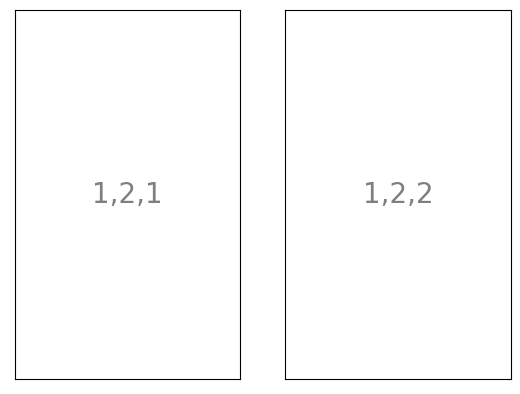

In [9]:
plt.subplot(1,2,1)
plt.xticks([]), plt.yticks([])
plt.text( 0.5, 0.5, '1,2,1', ha='center', 
          va='center', size=20, alpha=.5 )

plt.subplot(1,2,2)
plt.xticks([]), plt.yticks([])
plt.text( 0.5, 0.5, '1,2,2', ha='center', 
          va='center', size=20, alpha=.5 )

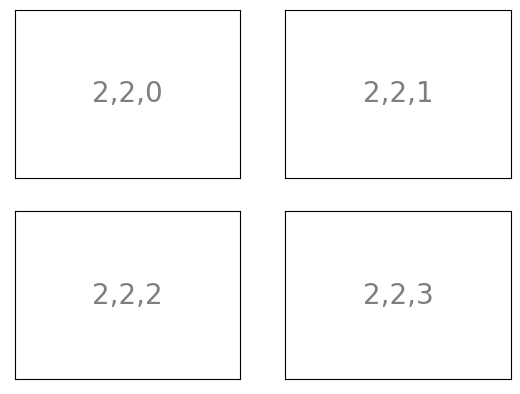

In [10]:
#下面通过坐标系生成 2*2 的子图
fig, axes = plt.subplots(nrows=2, ncols=2)
#得到的 axes 是一个 2×2 的对象。

#for 循环中用 axes.flat 将其打平，然后在每个 ax 上生成子图。 
for i, ax in enumerate(axes.flat):
    ax.set(xticks=[], yticks=[] )
    s = '2,2,' + str(i)
    ax.text( 0.5, 0.5, s, ha='center', 
          va='center', size=20, alpha=.5 )
    
plt.show()

Text(0.5, 0.5, 'style 1 \n plt.subplots() \n plt.plot()')

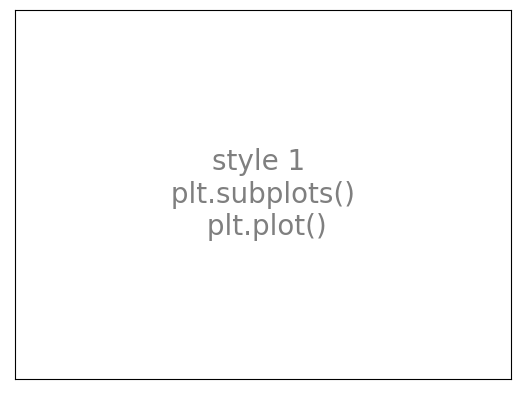

In [11]:
#两种生成坐标系的推荐代码
#同时生成图和坐标系。

fig, ax = plt.subplots()
ax.set(xticks=[], yticks=[] )
s = 'style 1 \n plt.subplots() \n plt.plot()'

ax.text( 0.5, 0.5, s, ha='center', 
          va='center', size=20, alpha=.5 )


Text(0.5, 0.5, 'style 2 \n plt.figure()\nfig.add_subplot() \n ax.plot()')

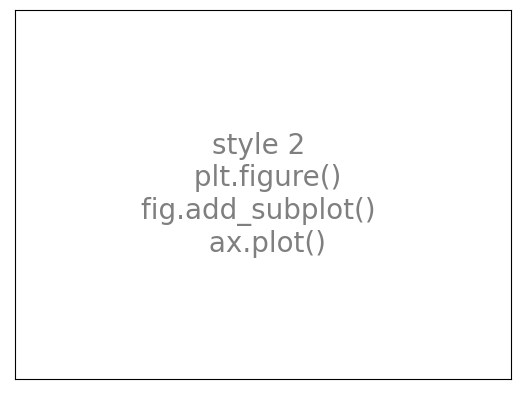

In [12]:
#先生成图，再添加坐标系。
fig = plt.figure()
ax= fig.add_subplot(1,1,1)

ax.set(xticks=[], yticks=[] )
s = 'style 2 \n plt.figure()\nfig.add_subplot() \n ax.plot()'

ax.text( 0.5, 0.5, s, ha='center', 
          va='center', size=20, alpha=.5 )


# 坐标轴
### 一个坐标系 (Axes)，通常是二维，有两条坐标轴 (Axis)：
- 横轴：XAxis
- 纵轴：YAxis

### 每个坐标轴都包含两个元素
- 容器类元素「刻度」lines，该对象里还包含刻度本身和刻度标签
- 基础类元素「标签」label，该对象包含的是坐标轴标签


### 「刻度」和「标签」都是对象，下面代码通过改变它们一些属性值来进行可视化。

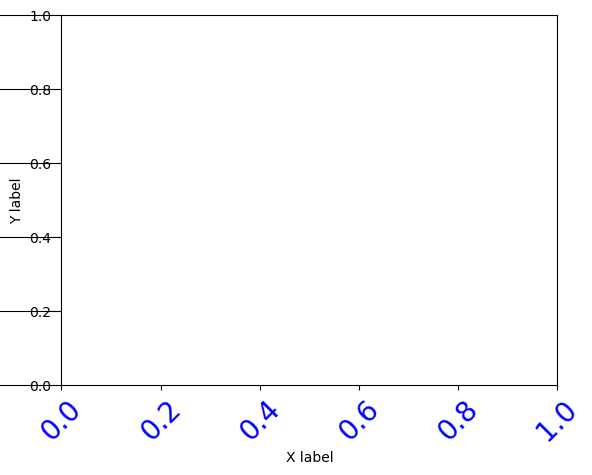

In [19]:
fig, ax = plt.subplots()

ax.set_xlabel('X label')
ax.set_ylabel('Y label')

for label in ax.xaxis.get_ticklabels():
    # label is a text instance
    label.set_color('blue')
    label.set_rotation(45)
    label.set_fontsize(20)

for line in ax.yaxis.get_ticklines():
    # line is a Line2D instance
    line.set_color('yellow')
    line.set_markersize(100)
    line.set_markeredgewidth(20)
    
plt.show()

## 目前，我们已经介绍四个最重要的容器以及它们之间的层级

    Figure → Axes → Axis → Ticks
    图 → 坐标系 → 坐标轴 → 刻度



### 但要画出一幅有内容的图，还需要在容器里添加基础元素比如线 (line), 点 (marker), 文字 (text), 图例 (legend), 网格 (grid), 标题 (title), 图片 (image) 等，具体来说
- 画一条线，用 plt.plot() 或 ax.plot()
- 画个记号，用 plt.scatter() 或 ax.scatter()
- 添加文字，用 plt.text() 或 ax.text()
- 添加图例，用 plt.legend() 或 ax.legend()
- 添加图片，用 plt.imshow() 或 ax.imshow()

### 最后用 Matplotlib 官网的图来总结所有元素。

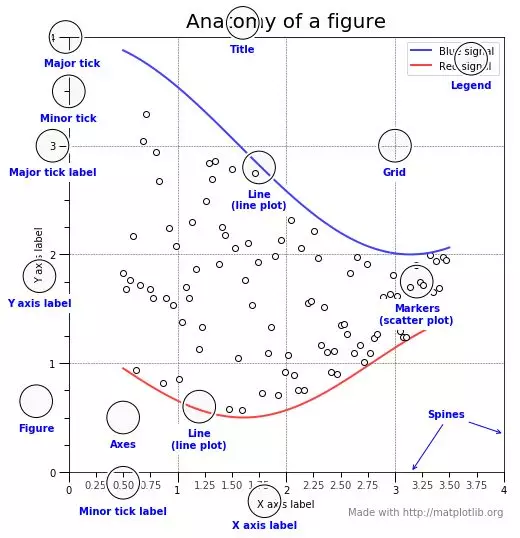

# 挑战 1 Quiz 1
### 尝试生成一个 3*3 的拼图,每个格子里填入相应数字. 尝试每个格子选用 不同的 Xlabel 颜色, Ylabel旋转不同角度


In [14]:
#Your answer here